<a href="https://colab.research.google.com/github/Jiyoun22/ComVi/blob/main/SSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single-Stage Instance Shadow Detection with Bidirectional Relation Learning (CVPR 2021 **Oral**)

[Tianyu Wang](https://stevewongv.github.io)\*, [Xiaowei Hu](https://xw-hu.github.io)\*, [Chi-Wing Fu](http://www.cse.cuhk.edu.hk/~cwfu/), and Pheng-Ann Heng
 (\* Joint first authors.)

 Instance Shadow Detection aims to find shadow instances, object instances and shadow-object associations; this task benefits many vision applications, such as light direction estimation and photo editing.

In this paper, we present a new single-stage fully convolutional network architecture with a bidirectional relation learning module to directly learn the relations of shadow and object instances in an end-to-end manner.

[[📄 Paper](https://openaccess.thecvf.com/content/CVPR2021/papers/Wang_Single-Stage_Instance_Shadow_Detection_With_Bidirectional_Relation_Learning_CVPR_2021_paper.pdf)] [[👇🏼 Video](http://www.youtube.com/watch?v=p0b_2SsFypw)]

[![YouTube](https://cdn.jsdelivr.net/gh/stevewongv/image-hosting@master/20210618/CVPR2021.273zljpaxzpc.jpg)](http://www.youtube.com/watch?v=p0b_2SsFypw "Single-Stage Instance Shadow Detection with Bidirectional Relation Learning (CVPR'21 Oral)")


In [ ]:
%matplotlib inline

In [ ]:
!nvidia-smi

import torch

if torch.cuda.is_available():
  print('Using GPU')
  device = 'cuda'
else:
  print('CUDA not available. Please connect to a GPU instance if possible.')
  device = 'cpu'

Sun Dec  1 05:39:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!gdown --id '1GyJIFvNMWOS_v6IXKxpVHBRKnzDQNYb8' -O '/content/dataset/'
!unzip  -q /content/dataset/SOBA_v2.zip -d /content/dataset/
#https://drive.google.com/file/d/1GyJIFvNMWOS_v6IXKxpVHBRKnzDQNYb8/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GyJIFvNMWOS_v6IXKxpVHBRKnzDQNYb8
From (redirected): https://drive.google.com/uc?id=1GyJIFvNMWOS_v6IXKxpVHBRKnzDQNYb8&confirm=t&uuid=8f06883d-85ee-4df3-842a-ba932f564750
To: /content/dataset/SOBA_v2.zip
100% 183M/183M [00:04<00:00, 39.3MB/s]
replace /content/dataset/SOBA/SOBA/ADE/ADE_train_00005062-1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ㅛ
error:  invalid response [ㅛ]
replace /content/dataset/SOBA/SOBA/ADE/ADE_train_00005062-1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ㅛ
error:  invalid response [ㅛ]
replace /content/dataset/SOBA/SOBA/ADE/ADE_train_00005062-1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/dataset/SOBA/SOBA/ADE/ADE_train_00005062-2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename

In [ ]:
!git clone https://github.com/stevewongv/SSIS.git

Cloning into 'SSIS'...
remote: Enumerating objects: 407, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 407 (delta 30), reused 11 (delta 7), pack-reused 343 (from 1)
Receiving objects: 100% (407/407), 6.97 MiB | 12.89 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!pip install pycocotools
!pip install git+https://github.com/facebookresearch/detectron2.git
!git clone https://github.com/stevewongv/InstanceShadowDetection.git
!pip install kornia==0.5.6

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-_id2venx
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-_id2venx
  Resolved https://github.com/facebookresearch/detectron2.git to commit c69939aa85460e8135f40bce908a6cddaa73065f
  Preparing metadata (setup.py) ... done
fatal: destination path 'InstanceShadowDetection' already exists and is not an empty directory.


In [ ]:
cd InstanceShadowDetection/PythonAPI/

/content/SSIS/demo/InstanceShadowDetection/PythonAPI


In [ ]:
!mv common ../
!sed -i 's|./common|../common|g' setup.py
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

In [ ]:
!pwd

/content/SSIS/demo/InstanceShadowDetection/PythonAPI


In [ ]:
'''
!cd /content/SSIS
'''

import os

os.chdir("/content/SSIS")


In [ ]:
!pwd

/content/SSIS


In [ ]:
!python setup.py develop

running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:41: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog

In [ ]:
!gdown --id '1eauD7J9Wcbm8K5ZOsHKa7kYA8wIm6m5I' -O '/content/SSIS/tools/output/SSISv2_MS_R_101_bifpn_with_offset_class_maskiouv2_da_bl/model_ssisv2_final.pth'
!gdown --id '1KeGxGwhqkETvBKFuAbAv6m_yvFYdwBjU' -O '/content/SSIS/tools/output/SSIS_MS_R_101_bifpn_with_offset_class/model_ssis_final.pth'
#https://drive.google.com/file/d/1KeGxGwhqkETvBKFuAbAv6m_yvFYdwBjU/view?usp=sharing # SSIS CVPR 2021
#https://drive.google.com/file/d/1eauD7J9Wcbm8K5ZOsHKa7kYA8wIm6m5I/view?usp=share_link # SSISv2 PAMI

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1eauD7J9Wcbm8K5ZOsHKa7kYA8wIm6m5I
From (redirected): https://drive.google.com/uc?id=1eauD7J9Wcbm8K5ZOsHKa7kYA8wIm6m5I&confirm=t&uuid=abf70f37-ac7c-4a19-86e8-aac079497ff8
To: /content/SSIS/tools/output/SSISv2_MS_R_101_bifpn_with_offset_class_maskiouv2_da_bl/model_ssisv2_final.pth
100% 615M/615M [00:07<00:00, 80.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1KeGxGwhqkETvBKFuAbAv6m_yvFYdwBjU
From (redirected): https://drive.google.com/uc?id=1KeGxGwhqkETvBKFuAbAv6m_yvFYd

In [ ]:
cd tools

/content/SSIS/tools


In [ ]:
# '/content/SSIS/tools' 안에있는 파일 실행
# !python train_net.py --config-file "../configs/SSIS/MS_R_101_BiFPN_SSISv2.yaml" --num-gpus 1 --resume --eval-only
!python train_net.py --config-file "../configs/SSIS/MS_R_101_BiFPN_with_offset_class.yaml" --num-gpus 1 --resume --eval-only

/content/SSIS/adet/modeling/MEInst/MaskEncoding.py:10: FutureWarning: Decorating classes is deprecated and will be disabled in future versions. You should only decorate functions or methods. To preserve the current behavior of class decoration, you can directly decorate the `__init__` method and nothing else.
  class PCAMaskEncoding(nn.Module):
/content/SSIS/adet/evaluation/text_evaluation.py:214: DeprecationWarning: invalid escape sequence '\S'
  template = "(\S+): (\S+): (\S+), (\S+): (\S+), (\S+): (\S+)"
Command Line Args: Namespace(config_file='../configs/SSIS/MS_R_101_BiFPN_with_offset_class.yaml', resume=True, eval_only=True, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=[])
Config '../configs/SSIS/MS_R_101_BiFPN_with_offset_class.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[12/01 05:46:11 detectron2]: Rank of current process: 0. World size: 1
[12/01 05:46:12 detectron2]: Environment info:
-------------------------------

In [ ]:
# '/content/SSIS/tools' 안에있는 파일 실행
!python SOAP.py --path ../../dataset/SOBA/annotations/SOBA_val_v2.json --input-name ./output/SSIS_MS_R_101_bifpn_with_offset_class

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
segmentaion:
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=2.36s).
Accumulating evaluation results...
Traceback (most recent call last):
  File "/content/SSIS/tools/SOAP.py", line 30, in <module>
    sobaeval.accumulate()
  File "/usr/local/lib/python3.10/dist-packages/pysobatools-2.0-py3.10-linux-x86_64.egg/pysobatools/sobaeval.py", line 521, in accumulate
    tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
  File "/usr/local/lib/python3.10/dist-packages/numpy/__init__.py", line 324, in __getattr__
    raise AttributeError(__former_attrs__[attr])
AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by

In [ ]:
# '/content/SSIS/tools' 안에있는 파일 실행
!python visualize_json_results.py --name ./output/SSIS_MS_R_101_bifpn_with_offset_class --output ./res_cvpr

/content/SSIS/adet/modeling/MEInst/MaskEncoding.py:10: FutureWarning: Decorating classes is deprecated and will be disabled in future versions. You should only decorate functions or methods. To preserve the current behavior of class decoration, you can directly decorate the `__init__` method and nothing else.
  class PCAMaskEncoding(nn.Module):
Traceback (most recent call last):
  File "/content/SSIS/tools/visualize_json_results.py", line 92, in <module>
    dicts = list(DatasetCatalog.get(args.dataset))
  File "/usr/local/lib/python3.10/dist-packages/detectron2/data/catalog.py", line 58, in get
    return f()
  File "/content/SSIS/adet/data/datasets/register_soba.py", line 32, in <lambda>
    DatasetCatalog.register(name, lambda: load_soba_json(json_file, image_root, name))
  File "/content/SSIS/adet/data/datasets/soba.py", line 50, in load_soba_json
    soba_api = SOBA(json_file)
  File "/usr/local/lib/python3.10/dist-packages/pysobatools-2.0-py3.10-linux-x86_64.egg/pysobatools/soba.

In [ ]:
import os

os.chdir("/content/SSIS/demo")

In [ ]:
!pwd

/content/SSIS/demo


In [ ]:
#demo.py를 실행하는 input output 경로 설정

!python demo.py --input ./samples



/content/SSIS/adet/modeling/MEInst/MaskEncoding.py:10: FutureWarning: Decorating classes is deprecated and will be disabled in future versions. You should only decorate functions or methods. To preserve the current behavior of class decoration, you can directly decorate the `__init__` method and nothing else.
  class PCAMaskEncoding(nn.Module):
[12/01 05:53:54 detectron2]: Arguments: Namespace(config_file='../configs/SSIS/MS_R_101_BiFPN_SSISv2_demo.yaml', webcam=False, video_input=None, input='./samples', output='./res/', confidence_threshold=0.1, opts=[])
WARNING [12/01 05:53:54 d2.config.compat]: Config '../configs/SSIS/MS_R_101_BiFPN_SSISv2_demo.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[12/01 05:53:56 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ../tools/output/SSISv2_MS_R_101_bifpn_with_offset_class_maskiouv2_da_bl/model_ssisv2_final.pth ...
/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning:

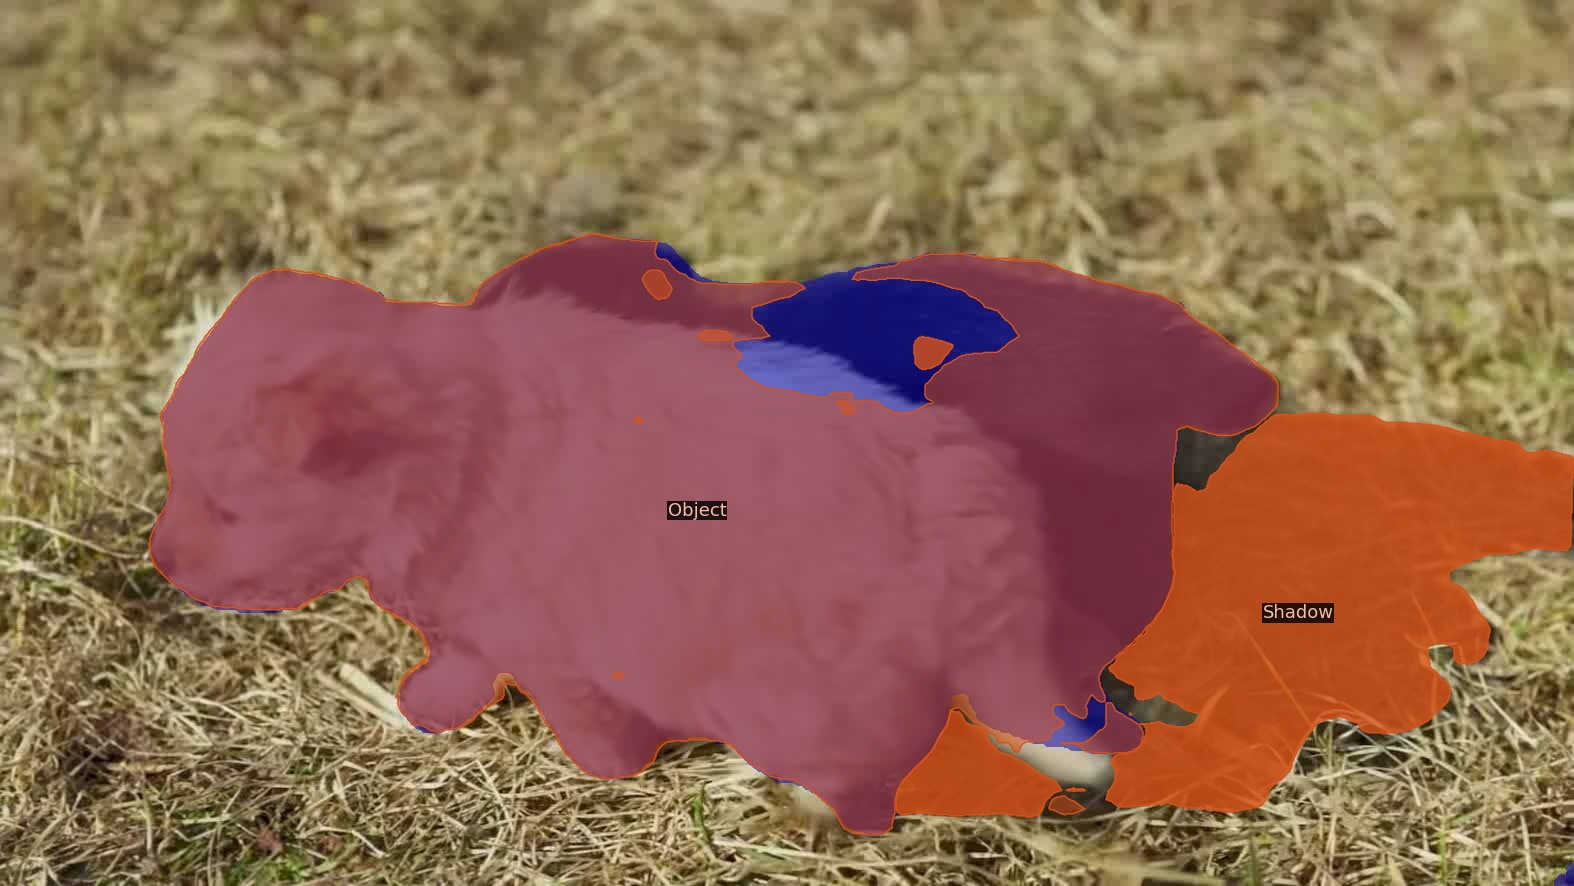

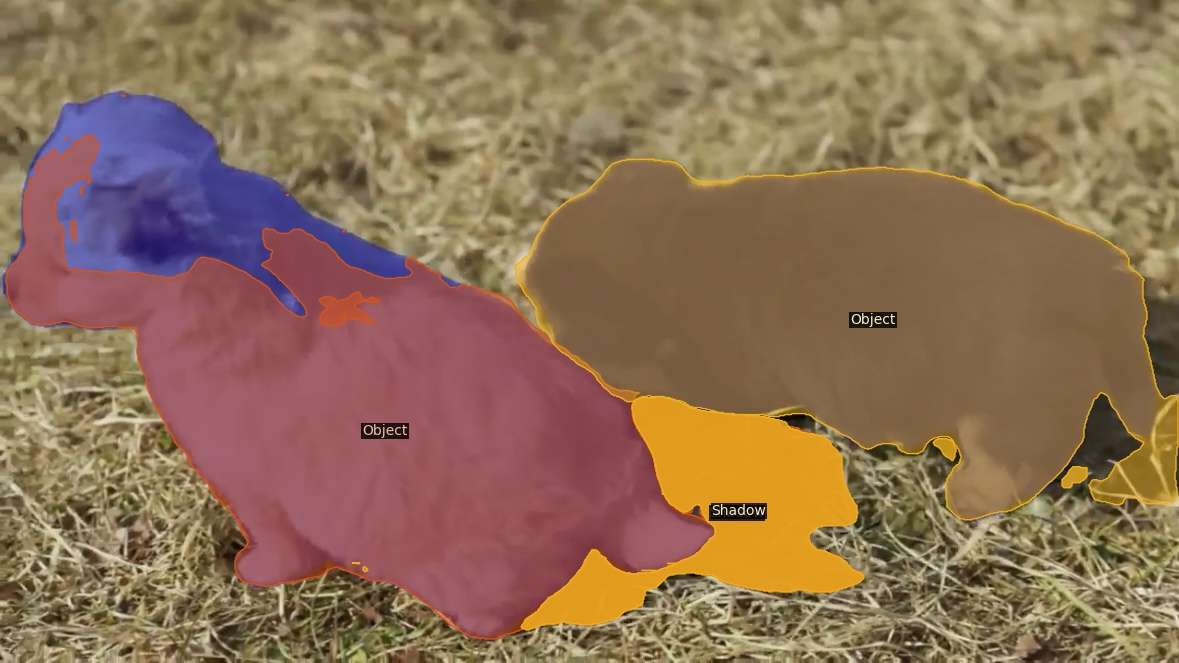

AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import os

for path in os.listdir('./res'):
  image = cv2.imread('./res/'+path)
  cv2_imshow(image)
  print('\n')

In [ ]:
import cv2
import os

# 이미지가 저장된 디렉토리 경로
image_directory = './res'  # demo.py가 저장한 결과 이미지 폴더
output_video_path = './output_video.mp4'  # 결과 비디오 파일 경로

# 이미지 파일 목록을 가져옴 (파일 이름으로 정렬)
image_paths = sorted([os.path.join(image_directory, fname) for fname in os.listdir(image_directory)])

# 첫 번째 이미지로 프레임 크기 얻기
frame = cv2.imread(image_paths[0])
frame_height, frame_width, _ = frame.shape

# 비디오 작성 객체 생성
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v'는 MP4 포맷
video_writer = cv2.VideoWriter(output_video_path, fourcc, 30, (frame_width, frame_height))  # 30 FPS

# 이미지들을 비디오로 변환
for image_path in image_paths:
    image = cv2.imread(image_path)
    video_writer.write(image)  # 비디오에 이미지 추가

# 비디오 파일 저장 후 객체 종료
video_writer.release()

print(f"비디오 저장 완료: {output_video_path}")


비디오 저장 완료: ./output_video.mp4


In [ ]:
!rm -rf ./samples/.ipynb_checkpoints

In [ ]:
!zip -r -q res.zip ./res_cvpr/


zip error: Nothing to do! (try: zip -r -q res.zip . -i ./res_cvpr/)


In [ ]:
import multiprocessing as mp
import atexit

# 定义一个函数在程序结束时释放 semaphore 资源
def cleanup():
    mp.get_all_start_methods()  # 触发 multiprocessing 模块的初始化
    mp.get_logger().debug('Cleaning up leaked semaphores...')
    mp.get_logger().setLevel(mp.SUBDEBUG)
    mp.get_logger().subdebug(mp.get_logger().handlers)
    mp.get_logger().subdebug(mp.active_children())
    mp.get_logger().subdebug(mp.get_all_semaphores())
    mp.get_logger().subdebug(mp.current_process())
    mp.get_logger().subdebug(mp.current_process()._semaphore_tracker._clean_exit)
    mp.get_logger().subdebug(mp.current_process()._semaphore_tracker._counter)
    mp.get_logger().subdebug(mp.current_process()._semaphore_tracker._semaphore_to_count)
    mp.get_logger().subdebug(mp.current_process()._semaphore_tracker._dirty)
    mp.get_logger().subdebug(mp.current_process()._semaphore_tracker._semaphore_to_lastpid)
    mp.get_logger().subdebug(mp.get_logger().handlers)
    mp.get_logger().subdebug(mp.current_process())
    mp.sem_unlink("/semaphore1")  # 释放 semaphore
    mp.sem_unlink("/semaphore2")
    # 你可以在这里添加其他需要释放的 semaphore
    mp.get_logger().debug('Finished cleaning up leaked semaphores.')

# 注册清理函数
atexit.register(cleanup)

<function __main__.cleanup()>